In [116]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import os, sys
import pandas as pd

import matplotlib as mpl

mpl.rcParams.update({"figure.facecolor": "white"})

cwd = os.getcwd()
dirLib = cwd + r'/../library'
if dirLib not in sys.path:
    sys.path.append(dirLib)
    
from load_ARSENL_data import set_binwidth

In [117]:
load_loc = r'C:\Users\Grant\OneDrive - UCB-O365\ARSENL\Experiments\SPCM\evaluation_loss'
fname_pois = r'\eval_loss_dtimeFalse_order8-21_shots1.00E+04_best_fit.csv'
fname_dead = r'\eval_loss_dtimeTrue_order8-21_shots1.00E+04_best_fit.csv'

load_ttag_loc = load_loc+ r'\fit_figures'
fname_ttag = r'\params_eval_loss_dtimeTrue_order8-21_ref_shots3.30E+06_lsr_shots1.00E+04_best_fit.pkl'

In [118]:
df_dead = pd.read_csv(load_loc + fname_dead)
df_pois = pd.read_csv(load_loc + fname_pois)

infile_ttag = open(load_ttag_loc+fname_ttag, 'rb')
load_ttag = pickle.load(infile_ttag)

In [119]:
flight_time_lst = load_ttag[0]
t_min = load_ttag[1]
t_max = load_ttag[2]
dt = load_ttag[3]
n_shots = load_ttag[4]
active_ratio_hst_lst = load_ttag[5]

In [120]:
t_fine = df_dead['time vector']
skip_first_num = 0

OD_lst = []
OD_name_lst = []
for column in df_dead:
    if column[:2] == 'OD':    
        OD_lst.append(float(column[2:]))
        OD_name_lst.append(column)
        
OD_lst = OD_lst[skip_first_num:]
OD_name_lst = OD_name_lst[skip_first_num:]
flight_time_lst = flight_time_lst[skip_first_num:]
active_ratio_hst_lst = active_ratio_hst_lst[skip_first_num:]

print('OD values investigated: {}'.format(OD_lst))

OD values investigated: [2.0, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3.0]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


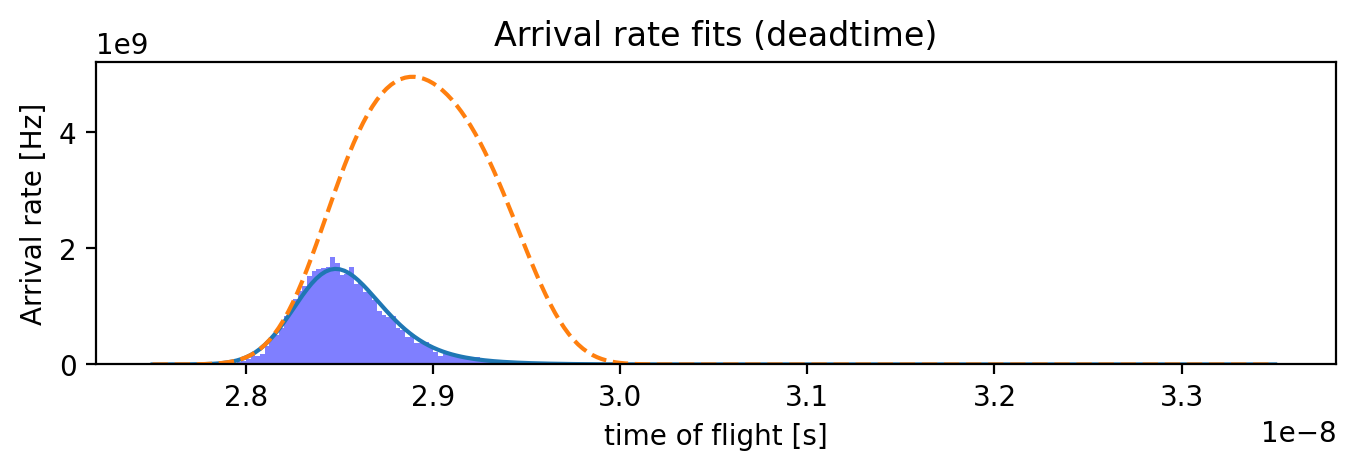

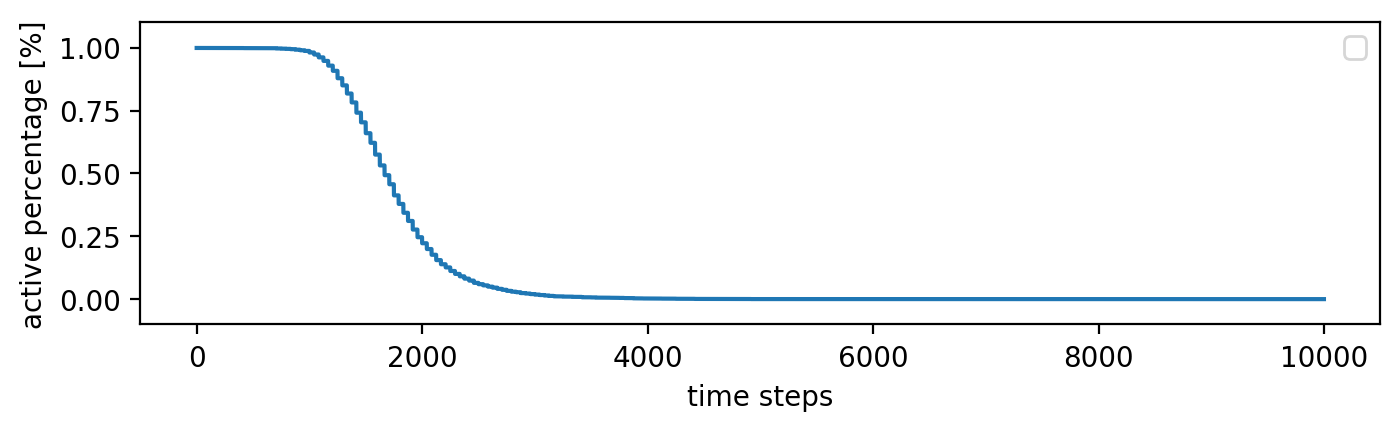

In [124]:
use_all_OD = False

if not use_all_OD:
    OD_val = 2.0

fig = plt.figure(dpi=200, figsize=(8,2))
ax = fig.add_subplot(111)
if use_all_OD:
    for i in range(len(OD_lst)):
        fit_dead = df_dead[OD_name_lst[i]]
        fit_pois = df_pois[OD_name_lst[i]]
        dead_max_idx = np.argmin(abs(np.array(fit_dead)-np.max(fit_dead)))
        pois_max_idx = np.argmin(abs(np.array(fit_pois)-np.max(fit_pois)))
        ax.plot(t_fine, fit_pois, '-')
        ax.plot(t_fine, fit_dead, '--', label='{}'.format(OD_name_lst[i]))
        ax.axvline(t_fine[dead_max_idx], color='b', alpha=0.5)
        ax.axvline(t_fine[pois_max_idx], color='y', alpha=0.5)
else:
    try:
        idx = np.where(np.array(OD_lst) == OD_val)[0][0]
    except:
        print('incorrect OD value')
        raise
    fit_dead = df_dead[OD_name_lst[idx]]
    fit_pois = df_pois[OD_name_lst[idx]]
    ax.plot(t_fine, fit_pois, '-', label='{}'.format(OD_name_lst[idx]))
    ax.plot(t_fine, fit_dead, '--', label='{}'.format(OD_name_lst[idx]))
    
    flight_time = flight_time_lst[idx]
    bin_array = set_binwidth(t_min, t_max, dt)
    n, bins = np.histogram(flight_time, bins=bin_array)
    binwidth = np.diff(bins)[0]
    N = n / binwidth / n_shots  # [Hz] Scaling counts to arrival rate
    center = 0.5 * (bins[:-1] + bins[1:])
    ax.bar(center, N, align='center', width=binwidth, color='b', alpha=0.5)
    
    fig = plt.figure(dpi=200, figsize=(8,2))
    ax_hst = fig.add_subplot(111)
    ax_hst.plot(active_ratio_hst_lst[idx])
    ax_hst.set_xlabel('time steps')
    ax_hst.set_ylabel('active percentage [%]')
    ax_hst.set_ylim([-0.1, 1.1])
    
ax.set_xlabel('time of flight [s]')
ax.set_ylabel('Arrival rate [Hz]')
ax.set_title('Arrival rate fits (deadtime)')
plt.legend()
plt.show()